In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def gini(array):
    """Calculate the Gini coefficient of a pandas array."""
    # based on Olivia Guest's https://github.com/oliviaguest/gini
    # modified to take the values from a series/pandas array before flatteningb
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.values.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [3]:
# Here's the 7 x 10 array
scores = np.random.randint(100, size= (7,10))

# Here are the names of the texts/observations
names = ['alpha','bravo','charlie','delta','echo','golf','hotel']

# And here are the observation names
years = [f'year{item}' for item in range(1,11)]

In [4]:
df = pd.DataFrame(data=scores, index=names, columns=years)

In [5]:
df.head(7)
cm = sns.light_palette("red", as_cmap=True)
df.style.background_gradient(cmap='Reds')

,year1,year2,year3,year4,year5,year6,year7,year8,year9,year10
alpha,12,22,10,7,91,60,3,62,89,3
bravo,36,7,97,95,67,66,24,45,40,10
charlie,43,65,54,11,65,42,75,7,32,1
delta,95,94,66,19,17,65,48,49,43,51
echo,78,53,11,47,89,82,58,59,61,73
golf,14,34,53,54,6,75,68,81,22,33
hotel,72,87,71,62,14,64,94,92,82,21


Ahead of turning things over to the wizardy of **pandas** I want to establish the math in my own head:

In [6]:
year1 = df.year1.tolist()
print(year1)

[12, 36, 43, 95, 78, 14, 72]


In [7]:
for i in year1:
    print(i/sum(year1))

0.03428571428571429
0.10285714285714286
0.12285714285714286
0.2714285714285714
0.22285714285714286
0.04
0.2057142857142857


Okay, those are our outcomes for `year1`, and when we wave the **pandas** wand we get the same results:

In [8]:
df = df / df.sum()
df.head(7)

,year1,year2,year3,year4,year5,year6,year7,year8,year9,year10
alpha,0.034286,0.060773,0.027624,0.023729,0.260745,0.132159,0.008108,0.156962,0.241192,0.015625
bravo,0.102857,0.019337,0.267956,0.322034,0.191977,0.145374,0.064865,0.113924,0.108401,0.052083
charlie,0.122857,0.179558,0.149171,0.037288,0.186246,0.092511,0.202703,0.017722,0.086721,0.005208
delta,0.271429,0.259669,0.182320,0.064407,0.048711,0.143172,0.129730,0.124051,0.116531,0.265625
echo,0.222857,0.146409,0.030387,0.159322,0.255014,0.180617,0.156757,0.149367,0.165312,0.380208
golf,0.040000,0.093923,0.146409,0.183051,0.017192,0.165198,0.183784,0.205063,0.059621,0.171875
hotel,0.205714,0.240331,0.196133,0.210169,0.040115,0.140969,0.254054,0.232911,0.222222,0.109375


In [9]:
df['STD'] = df.std(axis=1)
df.head(7)

,year1,year2,year3,year4,year5,year6,year7,year8,year9,year10,STD
alpha,0.034286,0.060773,0.027624,0.023729,0.260745,0.132159,0.008108,0.156962,0.241192,0.015625,0.095672
bravo,0.102857,0.019337,0.267956,0.322034,0.191977,0.145374,0.064865,0.113924,0.108401,0.052083,0.096159
charlie,0.122857,0.179558,0.149171,0.037288,0.186246,0.092511,0.202703,0.017722,0.086721,0.005208,0.071908
delta,0.271429,0.259669,0.182320,0.064407,0.048711,0.143172,0.129730,0.124051,0.116531,0.265625,0.081586
echo,0.222857,0.146409,0.030387,0.159322,0.255014,0.180617,0.156757,0.149367,0.165312,0.380208,0.090042
golf,0.040000,0.093923,0.146409,0.183051,0.017192,0.165198,0.183784,0.205063,0.059621,0.171875,0.067962
hotel,0.205714,0.240331,0.196133,0.210169,0.040115,0.140969,0.254054,0.232911,0.222222,0.109375,0.067780


In [10]:
df['Gini'] = df.apply(gini, axis=1)

# Be careful here. I think your Gini computation is including the St. Dev. column. 

In [11]:
df.head(7)

,year1,year2,year3,year4,year5,year6,year7,year8,year9,year10,STD,Gini
alpha,0.034286,0.060773,0.027624,0.023729,0.260745,0.132159,0.008108,0.156962,0.241192,0.015625,0.095672,0.487820
bravo,0.102857,0.019337,0.267956,0.322034,0.191977,0.145374,0.064865,0.113924,0.108401,0.052083,0.096159,0.351132
charlie,0.122857,0.179558,0.149171,0.037288,0.186246,0.092511,0.202703,0.017722,0.086721,0.005208,0.071908,0.359731
delta,0.271429,0.259669,0.182320,0.064407,0.048711,0.143172,0.129730,0.124051,0.116531,0.265625,0.081586,0.280547
echo,0.222857,0.146409,0.030387,0.159322,0.255014,0.180617,0.156757,0.149367,0.165312,0.380208,0.090042,0.254413
golf,0.040000,0.093923,0.146409,0.183051,0.017192,0.165198,0.183784,0.205063,0.059621,0.171875,0.067962,0.294911
hotel,0.205714,0.240331,0.196133,0.210169,0.040115,0.140969,0.254054,0.232911,0.222222,0.109375,0.067780,0.218497


In [12]:
df.sort_values(by=['STD']) # , ascending=True
df.style.bar(subset=['STD'], color='#d65f5f')

,year1,year2,year3,year4,year5,year6,year7,year8,year9,year10,STD,Gini
alpha,0.034286,0.060773,0.027624,0.023729,0.260745,0.132159,0.008108,0.156962,0.241192,0.015625,0.095672,0.487820
bravo,0.102857,0.019337,0.267956,0.322034,0.191977,0.145374,0.064865,0.113924,0.108401,0.052083,0.096159,0.351132
charlie,0.122857,0.179558,0.149171,0.037288,0.186246,0.092511,0.202703,0.017722,0.086721,0.005208,0.071908,0.359731
delta,0.271429,0.259669,0.182320,0.064407,0.048711,0.143172,0.129730,0.124051,0.116531,0.265625,0.081586,0.280547
echo,0.222857,0.146409,0.030387,0.159322,0.255014,0.180617,0.156757,0.149367,0.165312,0.380208,0.090042,0.254413
golf,0.040000,0.093923,0.146409,0.183051,0.017192,0.165198,0.183784,0.205063,0.059621,0.171875,0.067962,0.294911
hotel,0.205714,0.240331,0.196133,0.210169,0.040115,0.140969,0.254054,0.232911,0.222222,0.109375,0.067780,0.218497


In [17]:
plt.rcParams['figure.figsize'] = [12, 8]

In [13]:
sns.set()

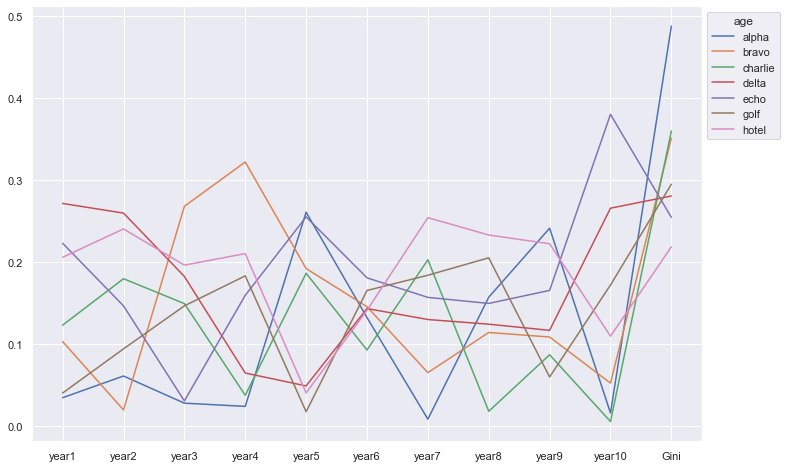

In [18]:
to_plot = df.drop(columns='STD')


for i in range(len(to_plot)):
    plt.plot([k for k in to_plot.columns], [to_plot[y].iloc[i] for y in to_plot.columns])
plt.legend(to_plot.index, title='age', bbox_to_anchor=(1, 1))
plt.show()